Este proyecto tiene como objetivo demostrar técnicas básicas de procesamiento de imágenes utilizando OpenCV y otras librerías comunes en Python. Se exploran operaciones fundamentales como lectura, visualización, conversión de colores, detección de bordes, transformaciones geométricas y filtrado.

## 📚 Importación de librerías

Se importan las librerías necesarias para trabajar con imágenes, manipular matrices y visualizar resultados.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL

## 📥 Carga de la imagen y procesamiento inicial

Cargamos la imagen desde el disco y la mostramos en pantalla utilizando matplotlib. Es necesario convertirla de formato BGR a RGB para que los colores se visualicen correctamente.

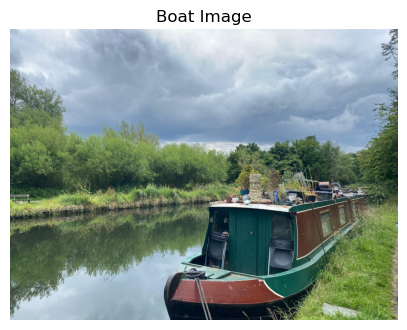

In [2]:
# Load the image
image = cv2.imread('imagenes/boat.jpeg')

# Plot image
plt.figure(figsize=(5, 5)) # Set figure size
plt.axis('off')  # Hide axes
plt.title('Boat Image')  # Set title

# Convert BGR to RGB for correct color representation
plt.imshow(image[:,:, ::-1])  

plt.show()

## 🧐 Información básica de la imagen

Analizamos las dimensiones de la imagen para conocer su resolución y número de canales de color.

In [3]:
image_shape = image.shape
max_value = np.max(image)
min_value = np.min(image)
unique_values = np.unique(image)

print(f"Image shape: {image_shape}")
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Unique values: {len(unique_values)}")

Image shape: (3024, 4032, 3)
Max value: 255
Min value: 0
Unique values: 256


## 🎨 Canales de color \n\nExploramos cómo se representan los colores en las diferentes bandas (R, G, B) de la imagen.


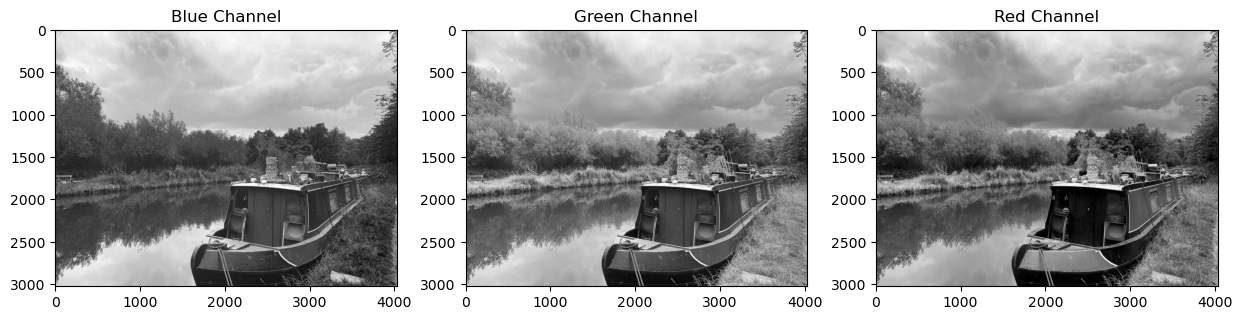

In [4]:
B = image[:, :, 0]
G = image[:, :, 1]
R = image[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(B, 'gray')
axes[0].set_title('Blue Channel')
axes[1].imshow(G, 'gray')
axes[1].set_title('Green Channel')
axes[2].imshow(R, 'gray')
axes[2].set_title('Red Channel')

plt.show()

## 📊 Histogramas \n\nAnalizamos la distribución de intensidades para cada canal de color.


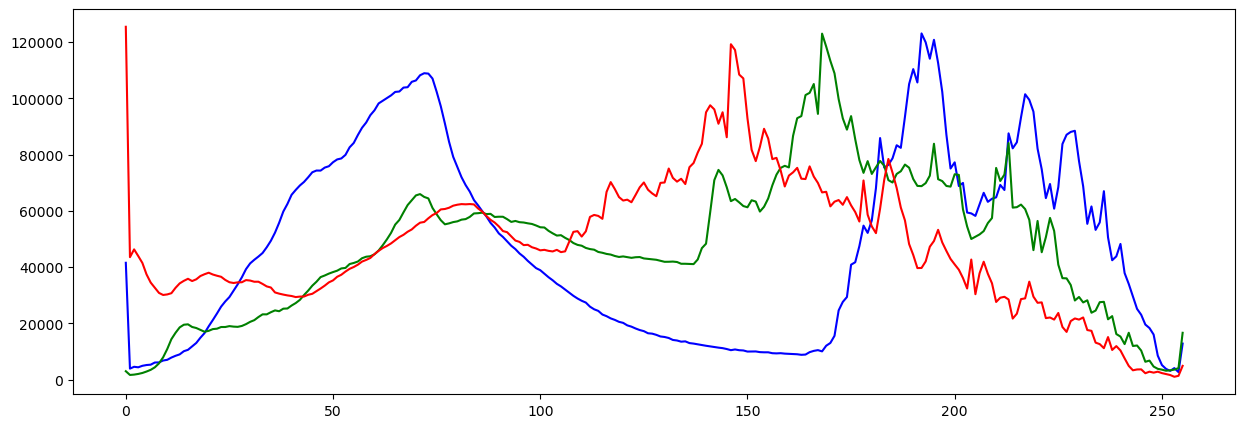

In [5]:
rows, cols = image.shape[:2]
hist = np.zeros(256)

# for j in range(rows):
#     for i in range(cols):
#       value = image[j, i]
#       hist[value] += 1

histB = cv2.calcHist([image], [0], None, [256], [0, 256])
histG = cv2.calcHist([image], [1], None, [256], [0, 256])
histR = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.figure(figsize=(15, 5))
plt.plot(histB, color='b', label='Blue Channel')
plt.plot(histG, color='g', label='Green Channel')
plt.plot(histR, color='r', label='Red Channel')
plt.show()

## 📏 Tamaño de la imagen \n\nRevisamos las dimensiones y el número total de píxeles.


In [6]:
# image = image[:, :, ::-1]  # Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Different method to convert BGR to RGB

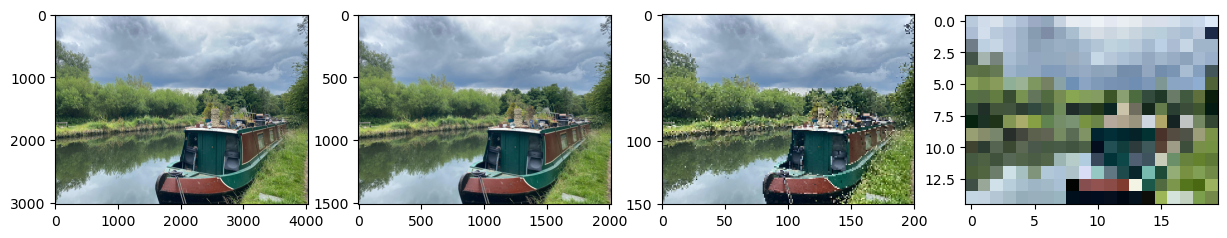

In [7]:
sizes_array = np.array([0.5, 0.05, 0.005])

fig, axes = plt.subplots(1, len(sizes_array)+1, figsize=(15, 5))
for i, sz in enumerate(sizes_array):
    resized_image = cv2.resize(
        image,
        dsize = (
            int(image.shape[1] * sz),
            int(image.shape[0] * sz)
        )
    )
    axes[i+1].imshow(resized_image)
axes[0].imshow(image)
plt.show() 

## 🌓 Conversión a blanco y negro \n\nConvertimos la imagen para analizarla sin información de color.


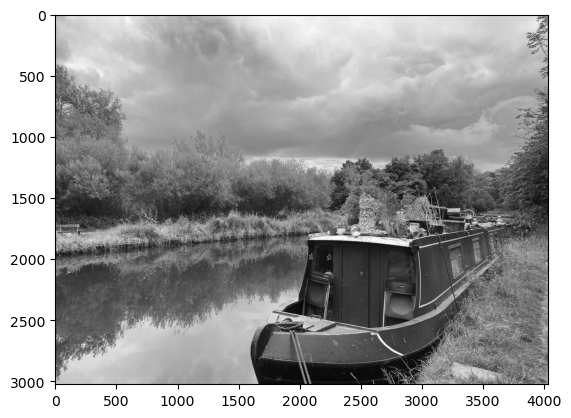

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.show()

## 🌗 Conversión a escala de grises \n\nReducimos la imagen a tonos de gris para simplificar el procesamiento.


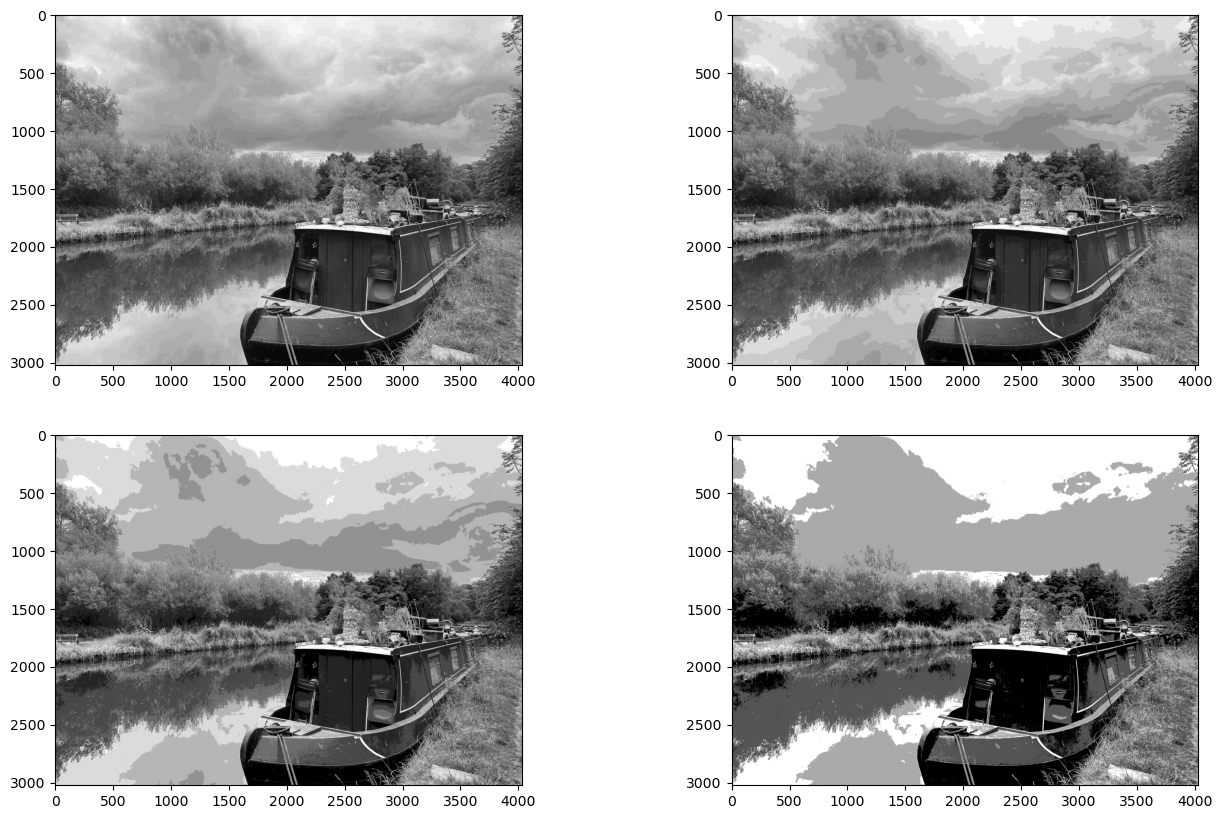

In [9]:
def gray_levels(n, image):
   step = 256 // n # al tener las dos barras no pone decimales
   reduced = (image // step) * step
   return reduced.astype(np.uint8) # convert to uint8

img32 = gray_levels(32, gray_image)
img16 = gray_levels(16, gray_image)
img8 = gray_levels(8, gray_image)
img4 = gray_levels(4, gray_image)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes[0, 0].imshow(img32, 'gray')
axes[0, 1].imshow(img16, 'gray')
axes[1, 0].imshow(img8, 'gray')
axes[1, 1].imshow(img4, 'gray')
plt.show()

## 🎨 Dithering \n\nTécnica para simular tonos mediante patrones de puntos aleatorios.


In [10]:
gray_image_dw = cv2.resize(
    gray_image,
    dsize = (
        int(gray_image.shape[1] * 0.2),
        int(gray_image.shape[0] * 0.2)
    )       
)

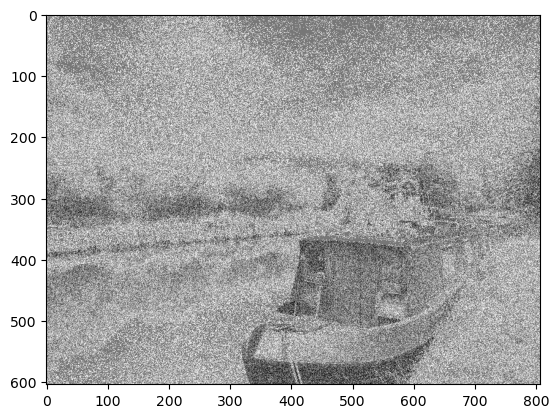

In [11]:
def white_noise_dithering(image, Fmax=255):
    image = image.astype(np.float32) # Convert to float for calculations
    noise = np.random.rand(*image.shape) * Fmax # Generate random noise [0, Fmax]
    noisy_image = image + noise # Add noise to the image
    dithered = np.where(noisy_image >= 255, 120, noisy_image).astype(np.uint8) # Clip values to [120, 255]
    
    return dithered

wn_image = white_noise_dithering(gray_image_dw, 150)
plt.figure()
plt.imshow(wn_image, cmap='gray')
plt.show()


## 🔧 Expansión del rango dinámico y transformación logarítmica \n\nExpandimos zonas oscuras y comprimimos zonas brillantes.


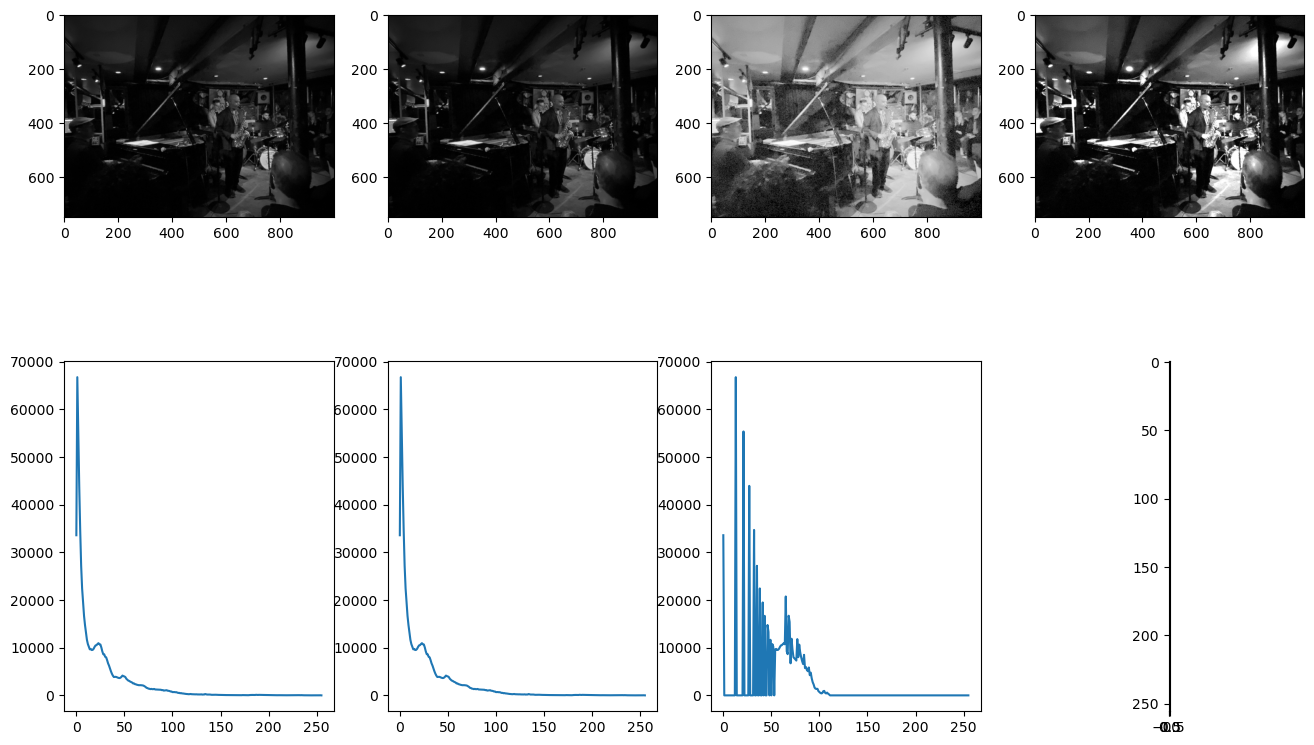

In [12]:
img = cv2.imread('imagenes/jazz.jpeg')

new_x = 1000
img = cv2.resize(
    img,
    dsize = (
        new_x,
        int(image.shape[0] * new_x / image.shape[1])
    )
)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def dynamic_range (img):
    img = img.astype(np.float32)
    return ((img - np.min(img)) / (np.max(img) - np.min(img)) * 255).astype(np.uint8)

def log_transform(img, c=255.0 / np.log(256)):
    img_min, img_max = np.min(img), np.max(img)
    streched = ((img.astype(np.float32) - img_min) / (img_max - img_min + 1e-6))
    
    log_img = c * np.log(1.0 + 255.0 * streched)
    return log_img.astype(np.uint8)

def clip_and_expand(img, min_val, max_val):
    img[img < min_val] = min_val
    img[img > max_val] = max_val
    img = (img - min_val) / (max_val - min_val) * 255
    return img.astype(np.uint8)

expanded_image = dynamic_range(gray_image)
log_image = log_transform(gray_image, 20)
clip_image = clip_and_expand(gray_image.copy(), 0, 100)

# Compute histograms
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_expanded = cv2.calcHist([expanded_image], [0], None, [256], [0, 256])
hist_log = cv2.calcHist([log_image], [0], None, [256], [0, 256])
hist_clip = cv2.calcHist([clip_image], [0], None, [256], [0, 256])

# Plot histograms
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes[0,0].imshow(gray_image, cmap='gray')
axes[0,1].imshow(expanded_image, cmap='gray')
axes[0,2].imshow(log_image, cmap='gray')
axes[0,3].imshow(clip_image, cmap='gray')
axes[1,0].plot(hist_gray)
axes[1,1].plot(hist_expanded)
axes[1,2].plot(hist_log)
axes[1,3].imshow(hist_clip)

plt.show()

## 🎨 Conversión de espacios de color \n\nTransformamos entre diferentes espacios como RGB, HSV, etc.


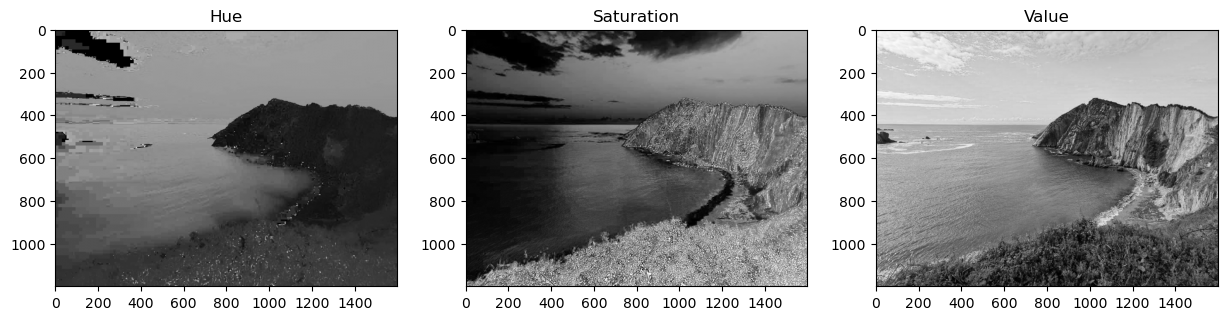

In [13]:
image = cv2.imread('imagenes/coast.jpeg')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(h, 'gray')
axes[0].set_title('Hue')
axes[1].imshow(s, 'gray')
axes[1].set_title('Saturation')
axes[2].imshow(v, 'gray')
axes[2].set_title('Value')
plt.show()

## 🎯 Umbralización (Thresholding) \n\nConvertimos la imagen en binaria según un valor límite.


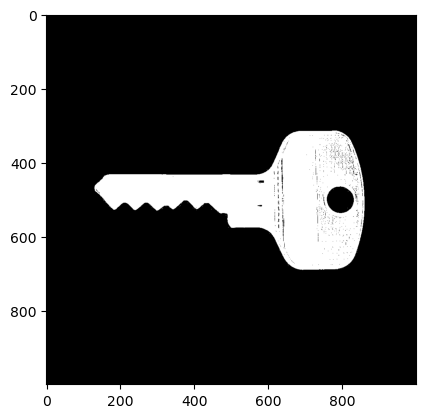

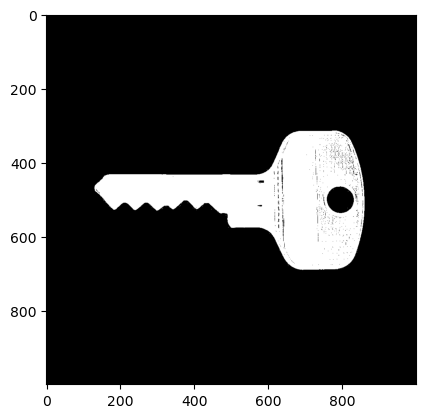

In [14]:
image = cv2.imread('imagenes/key_template.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tresholding
_, binary = cv2.threshold(gray_image, 250, 255, cv2.THRESH_BINARY_INV) # Inverted binary thresholding
plt.imshow(binary, 'gray')
plt.show()

# second method
binary2 = np.zeros_like(gray_image)
binary2[gray_image <= 250] = 255
plt.figure()
plt.imshow(binary2, 'gray')
plt.show()

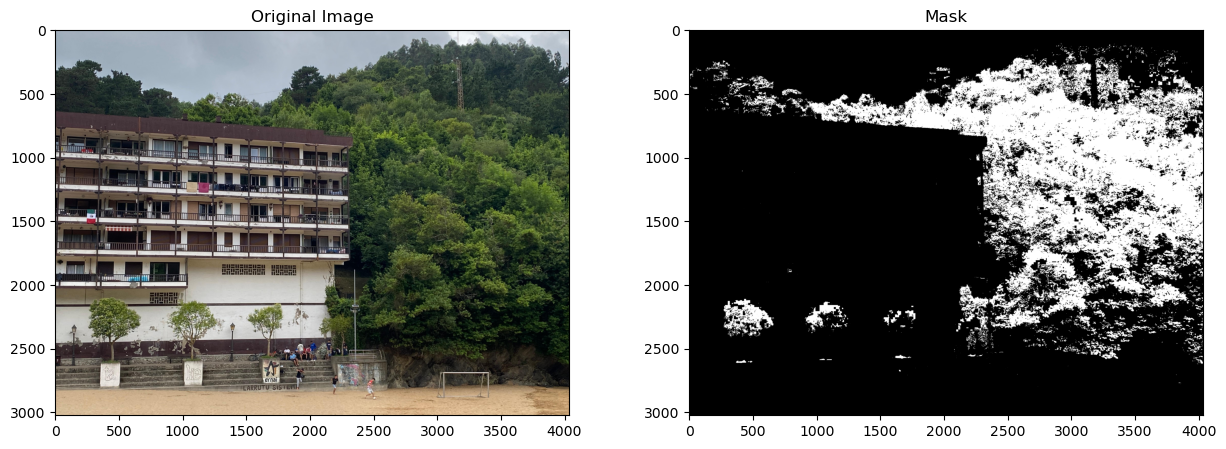

In [15]:
image = cv2.imread('imagenes/trees.jpeg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define green range HSV
lower_range = np.array([35, 50, 50])
upper_range = np.array([80, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_range, upper_range)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image[:, :, ::-1]) # Convert BGR to RGB
axes[0].set_title('Original Image')
axes[1].imshow(mask, 'gray')
axes[1].set_title('Mask')
plt.show()

## 🧹 Operaciones morfológicas \n\nAplicamos técnicas como erosión y dilatación para modificar la forma de los objetos.


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


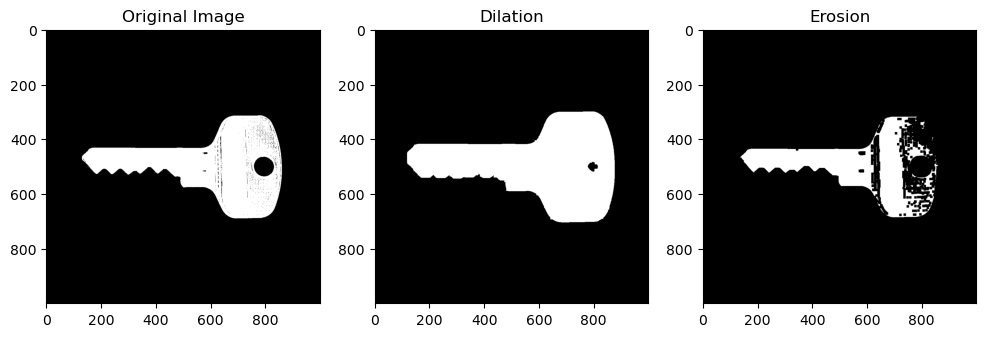

In [16]:
image = cv2.imread('imagenes/key_template.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray_image, 250, 255, cv2.THRESH_BINARY_INV) # Inverted binary thresholding

kernel = np.ones((5, 5), dtype=np.uint8) # Structuring element
print(kernel)

eroded = cv2.erode(binary, kernel, iterations=2) # Erosion twice
dilated = cv2.dilate(binary, kernel, iterations=7) # Dilation seven times

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(binary, 'gray')
axes[0].set_title('Original Image')
axes[1].imshow(dilated, 'gray')
axes[1].set_title('Dilation')
axes[2].imshow(eroded, 'gray')
axes[2].set_title('Erosion')
plt.show()

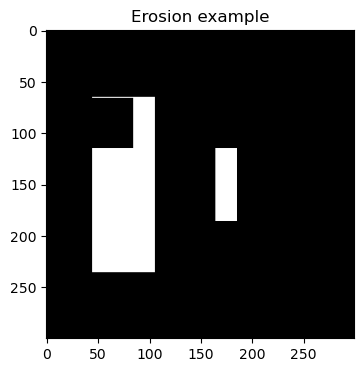

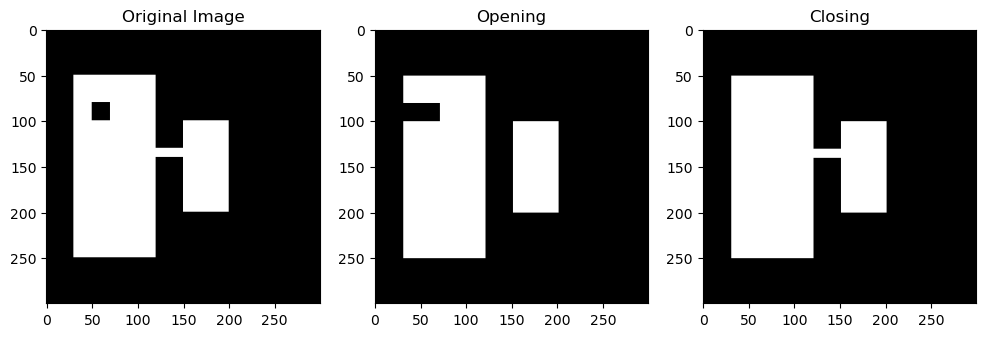

In [17]:
# Generate a synthetic image
image = np.zeros((300, 300), dtype=np.uint8)
image[50:250, 30:120] = 1
image[100:200, 150:200] = 1
image[130:140, 100:200] = 1
image[80:100, 50:70] = 0

# Morphological operations
kernel = np.ones((30, 30), dtype=np.uint8) # Structuring element
# Opening --> erosion followed by dilation
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
# Closing --> dilation followed by erosion
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Erosion example
eroded = cv2.erode(image, kernel, iterations=1) # Erosion
plt.figure(figsize=(8, 4))
plt.title('Erosion example')
plt.imshow(eroded, 'gray')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(image, 'gray')
axes[0].set_title('Original Image')
axes[1].imshow(opening, 'gray')
axes[1].set_title('Opening')
axes[2].imshow(closing, 'gray')
axes[2].set_title('Closing')
plt.show()


## 🔎 Detección de contornos \n\nIdentificamos los bordes de los objetos en la imagen.


In [18]:
colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
]

296
576


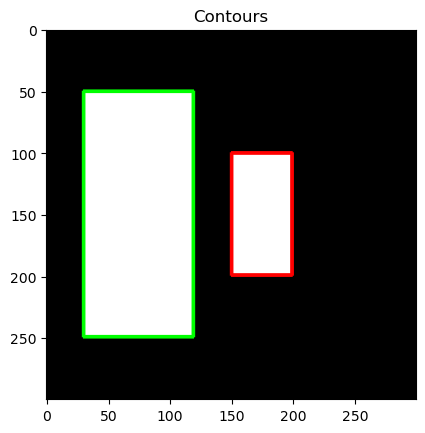

In [19]:
# Generate a synthetic image
image = np.zeros((300, 300), dtype=np.uint8)
image[50:250, 30:120] = 1
image[100:200, 150:200] = 1

# Image to RGB
image_rgb = np.repeat(image[:, :, None], 3, axis=2) * 255

# Find contours
contours, _ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for i, cont in enumerate(contours):
   print(len(cont))
   cv2.drawContours(image_rgb, cont, -1, colors[i%len(colors)], 2) # Draw contours

plt.imshow(image_rgb)
plt.title('Contours')
plt.show()

## 🎨 Ejercicio 1: Segmentación por color


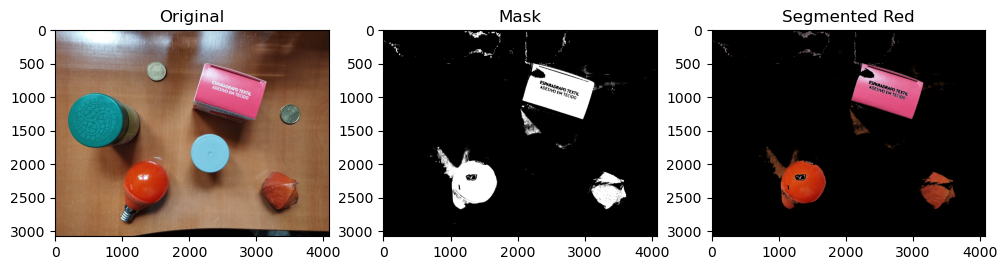

In [20]:
# Load image
image = cv2.imread('imagenes/redobjects.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define red color range (in HSV) -> Luz y Flor
lower_red = np.array([0, 170, 100])
upper_red = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)

# Define custom color range -> Caja esparadrapo
lower_red = np.array([150, 30, 100])
upper_red = np.array([190, 255, 255])
mask2 = cv2.inRange(hsv, lower_red, upper_red)

# Join masks (OR)
mask = cv2.bitwise_or(mask, mask2)

# Apply mask (AND)
segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(image_rgb); plt.title('Original')
plt.subplot(132); plt.imshow(mask, 'gray'); plt.title('Mask')
plt.subplot(133); plt.imshow(segmented); plt.title('Segmented Red')
plt.show()

## 🧮 Ejercicio 2: Conteo de objetos en la imagen


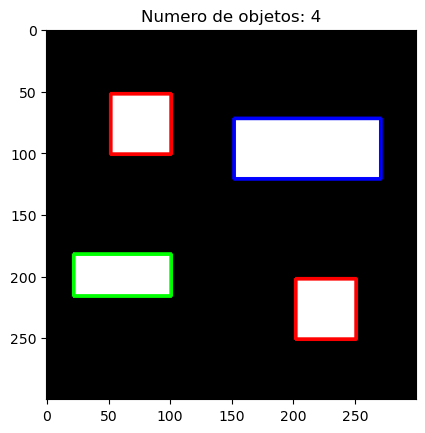

In [21]:
image = np.zeros((300, 300), dtype=np.uint8)
image[50:100, 50:100] = 1
image[200:250, 200:250] = 1
image[180:215, 20:100] = 1
image[70:120, 150:200] = 1
image[70:120, 200:270] = 1

image[90:100, 200:220] = 1
image[70:75, 70:75] = 0

# Opening then Closing
# Distintos tamanos de KERNEL
kernel = np.ones((10, 10), np.uint8)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((20, 20), np.uint8)
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

image_rgb = np.repeat(image[:, :, None], 3, axis=2)*255

contours, _ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, cont in enumerate(contours):
    cv2.drawContours(image_rgb, cont, -1, colors[i%len(colors)], 2)

plt.imshow(image_rgb)
plt.title(f'Numero de objetos: {len(contours)}')
plt.show()

## ✅ Conclusiones

Este proyecto cubre las bases del procesamiento de imágenes en Python con OpenCV. Las técnicas implementadas son fundamentales para tareas más complejas como visión por computadora y aprendizaje automático.

En futuras versiones se podrían explorar:
- Segmentación avanzada
- Reconocimiento de objetos
- Clasificación de imágenes con redes neuronales

## 🔄 Continuación: Clase 2 - Técnicas adicionales de procesamiento de imágenes

A continuación se amplían los conceptos vistos en la primera clase, incorporando nuevas técnicas como transformaciones más avanzadas, detección de características, y análisis de contornos.

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 🧩 Contour Matching

En esta sección exploraremos cómo comparar contornos para identificar similitudes entre formas en una imagen. Esta técnica se utiliza, por ejemplo, para reconocer objetos basados en su silueta.

In [23]:
def preprocess_image(image):
    # Convert to grayscale and threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV)

    # Find largest contour (the key)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    key_contour = max(contours, key=cv2.contourArea)

    # Fit a line to the contour (major axis)
    line_params = cv2.fitLine(key_contour, cv2.DIST_L2, 0, 0.01, 0.01)
    vx, vy, x0, y0 = line_params.flatten()  # Convert to 1D array and unpack

    # Compute endpoints of the major axis (for visualization)
    length = 1000
    x1 = int(x0 - vx * length)
    y1 = int(y0 - vy * length)
    x2 = int(x0 + vx * length)
    y2 = int(y0 + vy * length)

    # Calculate angle (0° = horizontal, 90° = vertical)
    angle = -np.degrees(np.arctan2(vy, vx)) % 180  # Normalized to [0, 180)

    # Center = midpoint of the major axis
    center = ((x1 + x2) // 2, (y1 + y2) // 2)

    # Visualization
    image = image.copy()
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.circle(image, center, 5, (0, 255, 0), -1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    return binary, center, angle, key_contour

In [24]:
def align_image(src_image, src_center, src_angle, target_center, target_angle, value):
    # Compute minimal angle difference (accounts for 180° symmetry)
    angle_diff = (target_angle - src_angle + 90) % 180 - 90

    # Rotate around source center
    rot_mat = cv2.getRotationMatrix2D(src_center, angle_diff, 1.0)
    rotated = cv2.warpAffine(src_image, rot_mat, (src_image.shape[1], src_image.shape[0]), borderValue=value)

    # Compute new center after rotation (homogeneous coordinates)
    new_center = np.dot(rot_mat, np.array([*src_center, 1]))

    # Translate to match target center
    dx = target_center[0] - new_center[0]
    dy = target_center[1] - new_center[1]
    trans_mat = np.float32([[1, 0, dx], [0, 1, dy]])
    aligned = cv2.warpAffine(rotated, trans_mat, (rotated.shape[1], rotated.shape[0]), borderValue=value)

    return aligned

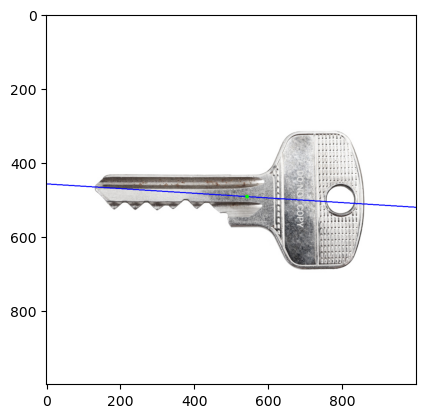

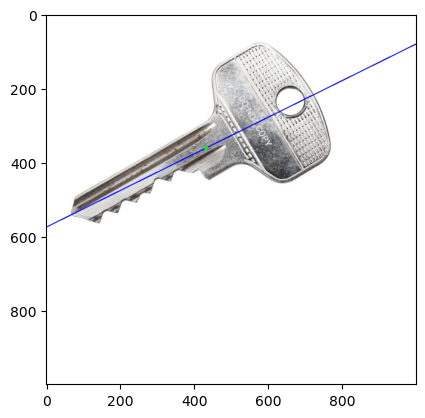

Similarity:0.011364170565136722


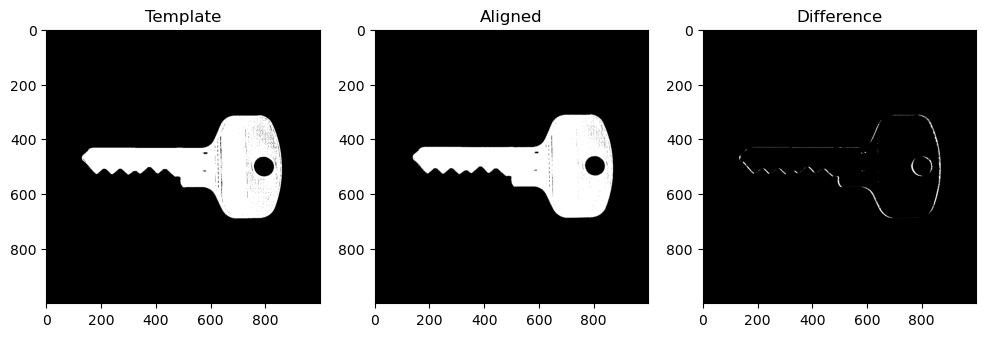

In [25]:
# Load images
template = cv2.imread('imagenes/key_template.png')
rotated = cv2.imread('imagenes/rotated.jpeg')

# Preprocess images
bin_template, c_template, ang_template, cont_template = preprocess_image(template)
bin_rotated, c_rotated, ang_rotated, cont_rotated = preprocess_image(rotated)

# Align rotated to template
aligned_bin = align_image(bin_rotated, c_rotated, ang_rotated, c_template, ang_template, 0)

# XOR to highlight differences
diff = cv2.bitwise_xor(bin_template, aligned_bin)
diff = cv2.erode(diff, np.ones((3, 3), dtype=np.uint8))

# Compute similarity using Hu moments
similarity = cv2.matchShapes(cont_template, cont_rotated, cv2.CONTOURS_MATCH_I1, 0.0)
print(f'Similarity:{similarity}')

# Display results
fig, axes = plt.subplots(1,3, figsize=(12, 6))
axes[0].imshow(bin_template, cmap='gray')
axes[0].set_title('Template')
axes[1].imshow(aligned_bin, cmap='gray')
axes[1].set_title('Aligned')
axes[2].imshow(diff, cmap='gray')
axes[2].set_title('Difference')
plt.show()

## 🔍 Entendiendo la Transformada de Hough

La Transformada de Hough permite detectar líneas rectas en imágenes, incluso cuando los bordes están fragmentados. Es muy útil en visión por computador para tareas de detección estructural.

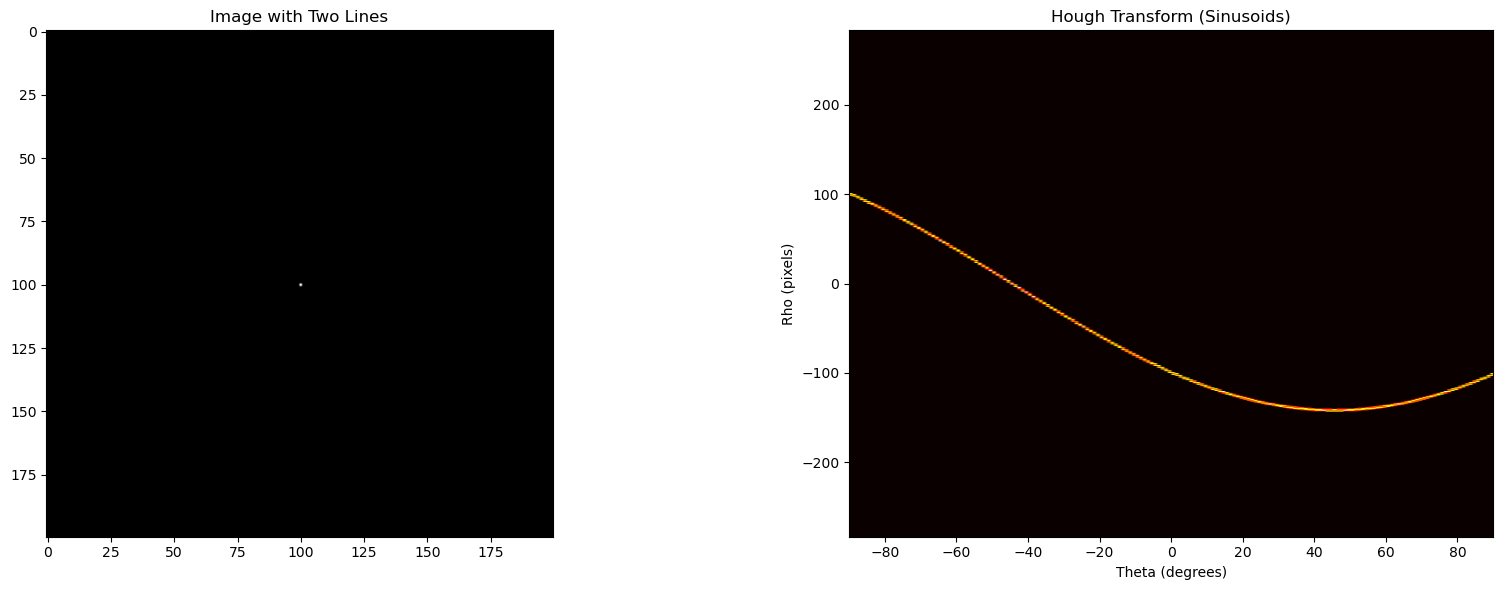

In [26]:
# Create a black image
img = np.zeros((200, 200), dtype=np.uint8)

img[100, 100] = 255
# cv2.line(img, (50, 150), (150, 50), 255, 2)   # Diagonal line (/)
# cv2.line(img, (50, 50), (150, 50), 255, 2)    # Horizontal line (-)

# Get coordinates of edge points
edges = cv2.Canny(img, 50, 150)
y_idxs, x_idxs = np.nonzero(edges)

# Hough Transform parameters
theta = np.deg2rad(np.arange(-90, 90))  # Angle range (-90° to 90°)
width, height = img.shape[1], img.shape[0]
diag_len = int(np.ceil(np.sqrt(width**2 + height**2)))  # max possible rho
rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

# Hough Accumulator (just to visualize sinusoids)
accumulator = np.zeros((len(rhos), len(theta)))

# Fill the accumulator (each edge point maps to a sinusoid in Hough space)
for x, y in zip(x_idxs, y_idxs):
    for t_idx in range(len(theta)):
        rho = x * np.cos(theta[t_idx]) + y * np.sin(theta[t_idx])
        rho_idx = int(rho + diag_len)
        accumulator[rho_idx, t_idx] += 1

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Original image
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Image with Two Lines")

# Hough space (sinusoids)
axs[1].imshow(accumulator, cmap='hot', extent=[-90, 90, -diag_len, diag_len], aspect=0.25)
axs[1].set_title("Hough Transform (Sinusoids)")
axs[1].set_xlabel("Theta (degrees)")
axs[1].set_ylabel("Rho (pixels)")

plt.tight_layout()
plt.show()


## 🌊 Transformada de Fourier en Imágenes

La Transformada de Fourier descompone una imagen en sus componentes de frecuencia. Esto permite analizar patrones repetitivos, filtrar ruido o incluso comprimir imágenes.

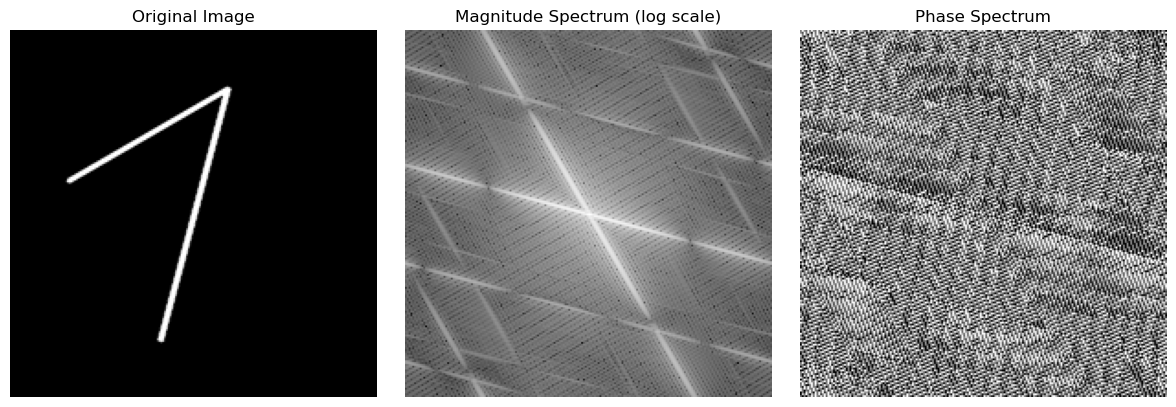

In [27]:
# Create a black image
img = np.zeros((200, 200), dtype=np.uint8)

cv2.line(img, (50, 150), (150, 50), 255, 2)   # Diagonal line (/)
cv2.line(img, (50, 50), (150, 50), 255, 2)    # Horizontal line (-)

# Rotate Image
rows, cols = img.shape[:2]
xc, yc = cols//2, rows//2
angle_rot = 30

rot_mat = cv2.getRotationMatrix2D((xc, yc), angle_rot, 1.0)
img = cv2.warpAffine(img, rot_mat, img.shape[:2][::-1], borderValue=0)

# Compute the 2D Discrete Fourier Transform (DFT)
dft = np.fft.fft2(img)  # Compute FFT
dft_shifted = np.fft.fftshift(dft)  # Shift zero-frequency to center

# Extract magnitude and phase
magnitude = np.abs(dft_shifted)  # Magnitude = sqrt(Re^2 + Im^2)
phase = np.angle(dft_shifted)    # Phase = arctan(Im / Re)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(132), plt.imshow(np.log1p(magnitude), cmap='gray')
plt.title('Magnitude Spectrum (log scale)'), plt.axis('off')

plt.subplot(133), plt.imshow(phase, cmap='gray')
plt.title('Phase Spectrum'), plt.axis('off')

plt.tight_layout()
plt.show()

### 🔄 Transformada Inversa

Nos permite reconstruir la imagen original a partir de sus componentes en frecuencia. Fundamental para validar cualquier transformación realizada.

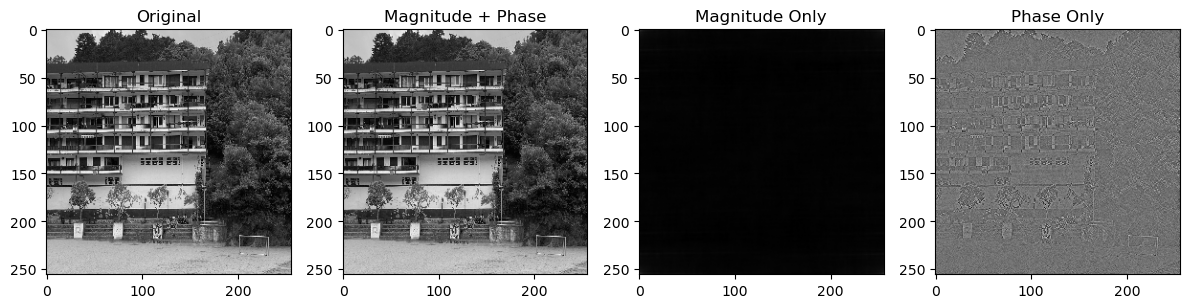

In [28]:
# Load image in grayscale
image = cv2.imread('imagenes/lines.jpeg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))  # Resize for simplicity

# Compute Fourier Transform and shift zero-frequency to center
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

# Extract magnitude and phase
magnitude = np.abs(dft_shifted)  # Magnitude = sqrt(Re² + Im²)
phase = np.angle(dft_shifted)    # Phase = arctan(Im / Re)

# Reconstruct image from magnitude and phase
reconstructed_complex = magnitude * np.exp(1j * phase)  # Combine magnitude and phase
reconstructed_dft = np.fft.ifftshift(reconstructed_complex)  # Undo the shift
reconstructed_image = np.fft.ifft2(reconstructed_dft)  # Inverse FT
reconstructed_image = np.abs(reconstructed_image)  # Take real part

# Reconstruct using ONLY magnitude (phase=0)
recon_magnitude_only = np.fft.ifft2(np.fft.ifftshift(magnitude)).real

# Reconstruct using ONLY phase (magnitude=1)
recon_phase_only = np.fft.ifft2(np.fft.ifftshift(np.exp(1j * phase))).real

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(141), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(142), plt.imshow(reconstructed_image, cmap='gray'), plt.title("Magnitude + Phase")
plt.subplot(143), plt.imshow(recon_magnitude_only, cmap='gray'), plt.title("Magnitude Only")
plt.subplot(144), plt.imshow(recon_phase_only, cmap='gray'), plt.title("Phase Only")
plt.tight_layout()
plt.show()

### 🎛️ Manipulación de Fases

Al modificar las fases en el dominio de Fourier, se pueden alterar características importantes de la imagen. Esto tiene aplicaciones en compresión y efectos visuales.

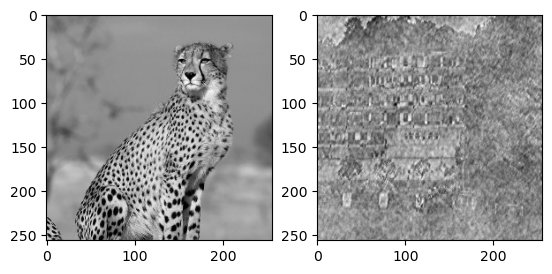

In [29]:
# Load and resize image 1
image1 = cv2.imread('imagenes/cheetah.jpg', cv2.IMREAD_GRAYSCALE)
image1 = cv2.resize(
    image1,
    dsize=(256, 256)
)

# Load and resize image 2
image2 = cv2.imread('imagenes/lines.jpeg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.resize(
    image2,
    dsize=(256, 256)
)

# Compute fourier transform
dft = np.fft.fft2(image1)
dft_image2 = np.fft.fft2(image2)

# Swap phase
image_phase_swapped = np.fft.ifft2(np.abs(dft) * np.exp(1j * np.angle(dft_image2))).real

fig, axes = plt.subplots(1, 2)
axes[0].imshow(image1, 'gray')
axes[1].imshow(image_phase_swapped, 'gray')
plt.show()


## 🧪 Ejercicio: Filtros de Frecuencia

- 🔹 **Eliminar altas frecuencias:** se atenúan los detalles finos de la imagen.
- 🔸 **Eliminar bajas frecuencias:** se eliminan las estructuras generales, destacando los bordes.

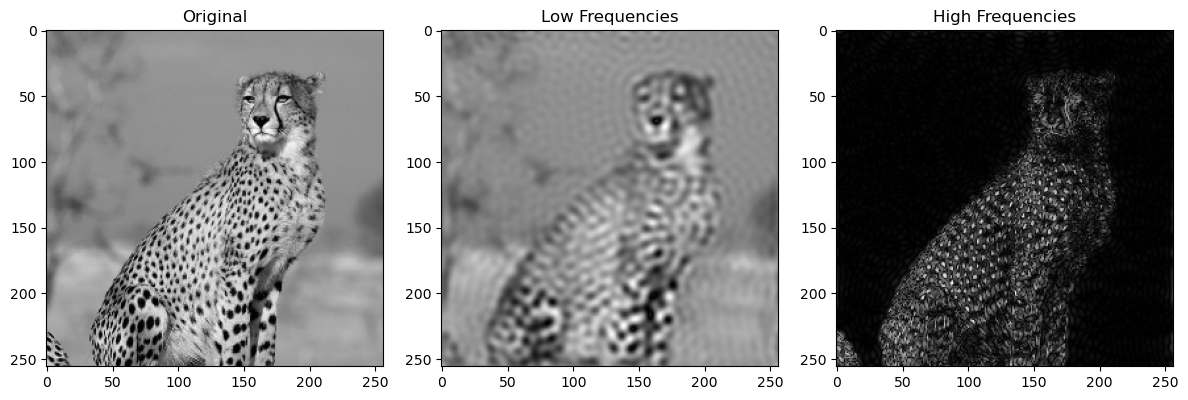

In [30]:
# Load and prepare image
image = cv2.imread('imagenes/cheetah.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))

# Fourier Transform
dft = np.fft.fftshift(np.fft.fft2(image))
rows, cols = image.shape
crow, ccol = rows//2, cols//2

# Low-pass filter (keep low frequencies)
## DO SOMETHING HERE
mask_low = np.zeros_like(image)
radius = 30
cv2.circle(mask_low, (ccol, crow), radius, 1, -1)  # Create a circular mask
dft_low = dft * mask_low  # Apply mask to DFT
img_low = np.abs(np.fft.ifft2(np.fft.ifftshift(dft_low)))

# High-pass filter (keep high frequencies)
## DO SOMETHING HERE
mask_high = np.zeros_like(image)
radius = 30
cv2.circle(mask_high, (ccol, crow), radius, 1, -1)  # Create a circular mask
mask_high = 1 - mask_high  # Invert mask for high-pass
dft_high = dft * mask_high  # Apply mask to DFT
img_high = np.abs(np.fft.ifft2(np.fft.ifftshift(dft_high)))

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(132), plt.imshow(img_low, cmap='gray'), plt.title("Low Frequencies")
plt.subplot(133), plt.imshow(img_high, cmap='gray'), plt.title("High Frequencies")
plt.tight_layout()
plt.show()

## 🌫️ Desenfoque (Gaussian Blur)

Aplicamos un desenfoque gaussiano para suavizar la imagen y reducir el ruido. Esta técnica es clave en preprocesamiento antes de aplicar detección de bordes o contornos.

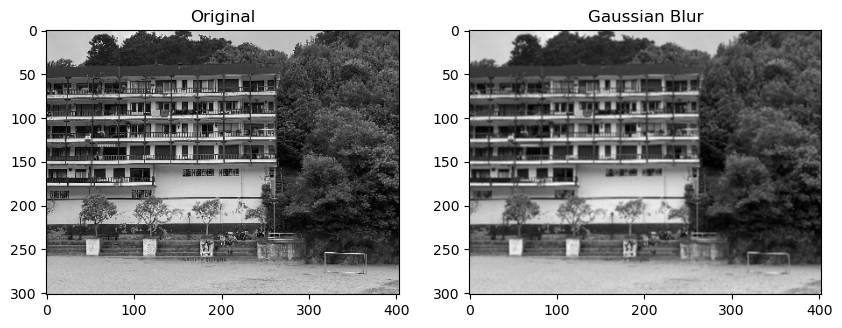

In [31]:
# Load image
image = cv2.imread('imagenes/lines.jpeg', cv2.IMREAD_GRAYSCALE)
downscale_factor = 0.1
image = cv2.resize(
    image,
    dsize=(
        int(image.shape[1]*downscale_factor),
        int(image.shape[0]*downscale_factor)
    )
)

# Define 3x3 Gaussian blur kernel
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16  # Normalize to sum=1

# gaussian_kernel = np.array([
#     [1,  4,  6,  4, 1],
#     [4, 16, 24, 16, 4],
#     [6, 24, 36, 24, 6],
#     [4, 16, 24, 16, 4],
#     [1,  4,  6,  4, 1]
# ]) / 256

# Apply convolution
blurred = cv2.filter2D(image, -1, gaussian_kernel)
# blurred = cv2.filter2D(image, -1, gaussian_kernel, borderType=cv2.BORDER_REFLECT)

# Opencv alternative
# blurred = cv2.GaussianBlur(image, (11, 11), sigmaX=1)

# Plot
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(blurred, cmap='gray'), plt.title('Gaussian Blur')
plt.show()

## 🧱 Detección de Bordes (Operador Sobel)

El operador Sobel permite detectar bordes mediante el cálculo del gradiente de intensidad. Veremos cómo se extraen los contornos horizontales y verticales.

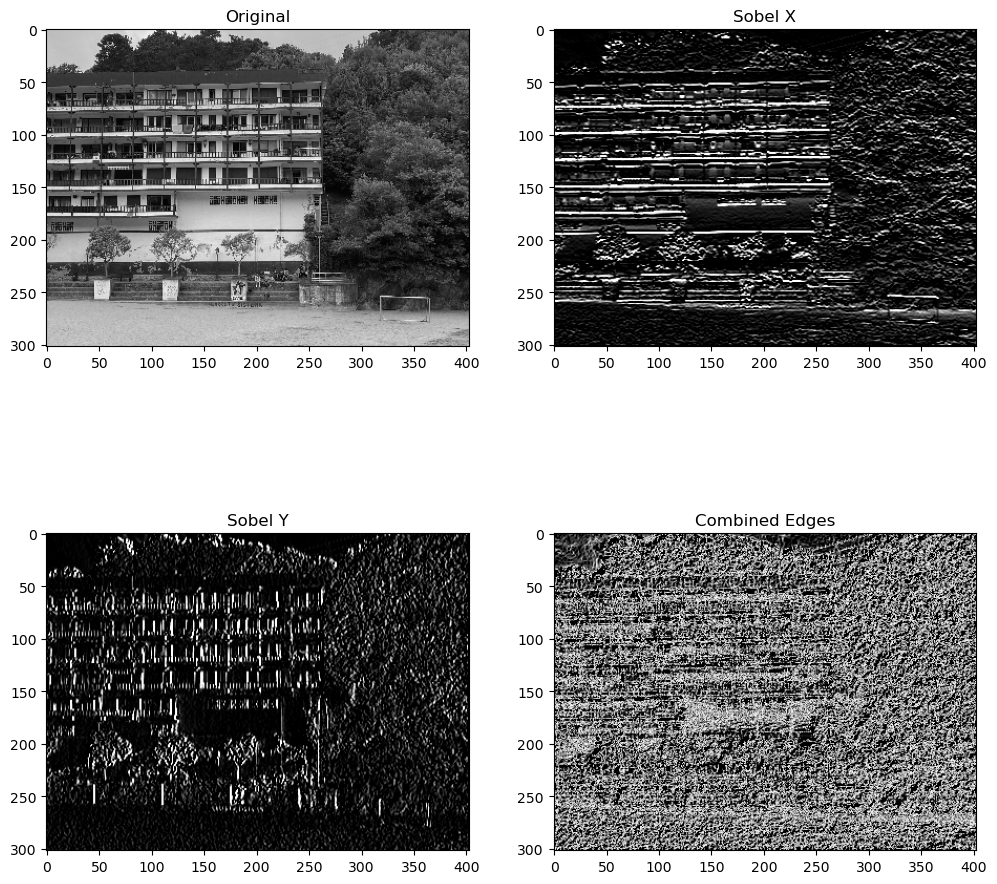

In [32]:
image = cv2.imread('imagenes/lines.jpeg', cv2.IMREAD_GRAYSCALE)
downscale_factor = 0.1
image = cv2.resize(
    image,
    dsize=(
        int(image.shape[1]*downscale_factor),
        int(image.shape[0]*downscale_factor)
    )
)

# Define Sobel kernels
sobel_x = np.array([  # Detects horizontal edges
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

sobel_y = np.array([  # Detects vertical edges
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Apply convolutions
edges_x = cv2.filter2D(image, -1, sobel_x)
edges_y = cv2.filter2D(image, -1, sobel_y)
edges_combined = np.sqrt(edges_x**2 + edges_y**2)  # Magnitude of gradient

# Plot
plt.figure(figsize=(12, 12))
plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(222), plt.imshow(edges_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(223), plt.imshow(edges_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(224), plt.imshow(edges_combined, cmap='gray'), plt.title('Combined Edges')
plt.show()

## 📏 Detección de Líneas en la Imagen

Utilizando técnicas como la Transformada de Hough, detectamos líneas rectas presentes en la imagen. Esto se puede aplicar, por ejemplo, en el reconocimiento de estructuras o caminos.

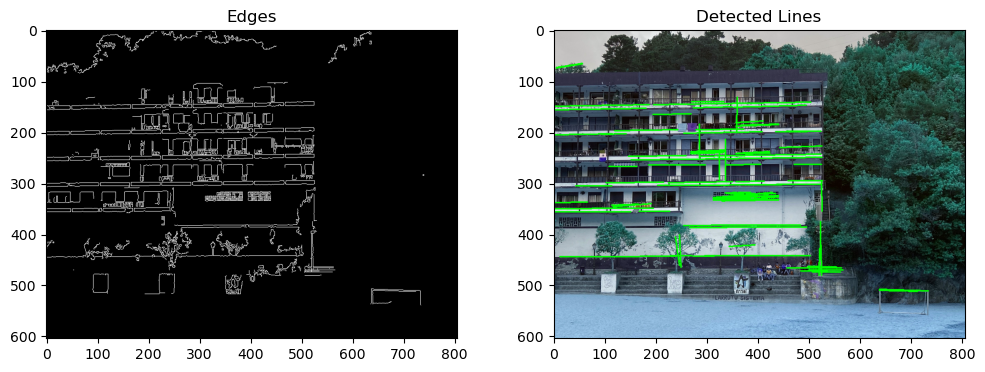

In [33]:
import cv2
import numpy as np

image = cv2.imread('imagenes/lines.jpeg')
downscale_factor = 0.2
image = cv2.resize(
    image,
    dsize=(
        int(image.shape[1]*downscale_factor),
        int(image.shape[0]*downscale_factor)
    )
)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Blur image
image_gray = cv2.GaussianBlur(image_gray, (11, 11), sigmaX=0.5)

# Edge detection (Canny)
edges = cv2.Canny(image_gray, 200, 600, apertureSize=3)

# Hough Line Transform (Probabilistic Hough)
lines = cv2.HoughLinesP(
    edges,            # Edge image
    rho=1,            # Distance resolution (pixels)
    theta=np.pi/180,  # Angle resolution (radians)
    threshold=50,     # Min. votes to detect a line
    minLineLength=50, # Min. line length (pixels)
    maxLineGap=10     # Max. allowed gap between line segments
)

# Draw detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines, thickness=2

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(121), plt.imshow(edges, 'gray'), plt.title('Edges')
plt.subplot(122), plt.imshow(image), plt.title('Detected Lines')
plt.show()

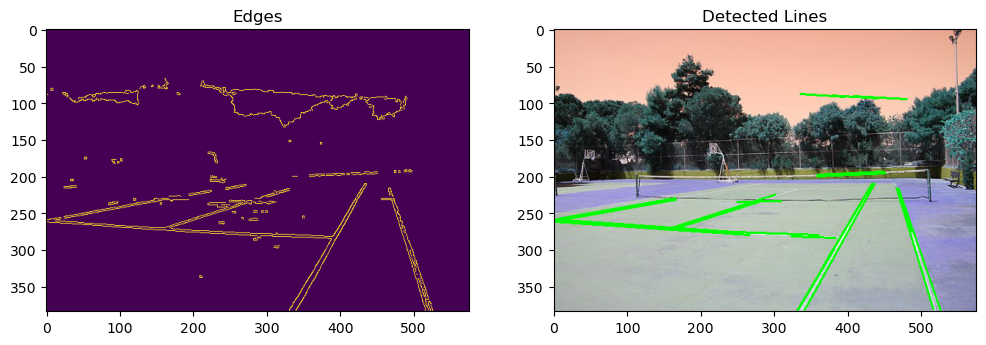

In [34]:
import cv2
import numpy as np

image = cv2.imread('imagenes/tennis_court.jpg')
downscale_factor = 0.9
image = cv2.resize(
    image,
    dsize=(
        int(image.shape[1]*downscale_factor),
        int(image.shape[0]*downscale_factor)
    )
)

# Convert to grayscale and threshold
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image_gray = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY_INV)

# Blur image
image_gray = cv2.GaussianBlur(image_gray, (11, 11), sigmaX=0.8)

# Edge detection (Canny)
edges = cv2.Canny(image_gray, 400, 600, apertureSize=3)

# Hough Line Transform (Probabilistic Hough)
lines = cv2.HoughLinesP(
    edges,            # Edge image
    rho=1,            # Distance resolution (pixels)
    theta=np.pi/180,  # Angle resolution (radians)
    threshold=60,     # Min. votes to detect a line
    minLineLength=50, # Min. line length (pixels)
    maxLineGap=10     # Max. allowed gap between line segments
)

# Draw detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines, thickness=2

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(121), plt.imshow(edges), plt.title('Edges')
plt.subplot(122), plt.imshow(image), plt.title('Detected Lines')
plt.show()

## 🧪 Ejercicio: Detectar una Caja

Se utilizarán técnicas de detección de bordes y líneas para identificar una caja en una imagen. Este ejercicio refuerza la aplicación práctica del procesamiento geométrico.

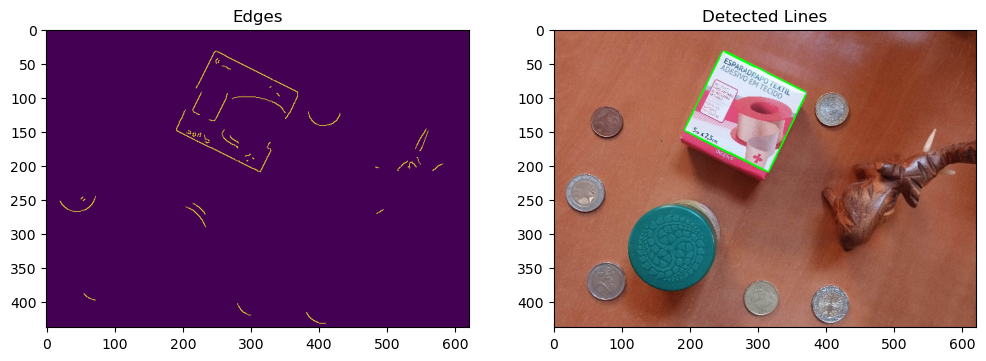

In [35]:
import cv2
import numpy as np

# Load image
image = cv2.imread('imagenes/coins_and_box.jpeg')  # Replace with your image
downscale_factor = 0.2
image = cv2.resize(
    image,
    dsize=(
        int(image.shape[1]*downscale_factor),
        int(image.shape[0]*downscale_factor)
    )
)

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blur image
blurred = cv2.GaussianBlur(image_gray, (5, 5), 2)

# Edge detection (Canny)
edges = cv2.Canny(blurred, 150, 200)

# Hough Line Transform (Probabilistic Hough)
lines = cv2.HoughLinesP(
    edges,            # Edge image
    rho=1,            # Distance resolution (pixels)
    theta=np.pi/180,  # Angle resolution (radians)
    threshold=40,     # Min. votes to detect a line
    minLineLength=30, # Min. line length (pixels)
    maxLineGap=50     # Max. allowed gap between line segments
)

# Draw detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines, thickness=2

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(121), plt.imshow(edges), plt.title('Edges')
plt.subplot(122), plt.imshow(image[:,:,::-1]), plt.title('Detected Lines')
plt.show()

## 🧪 Ejercicio: Medir el Nivel de Líquido en una Botella

Con técnicas de segmentación y análisis de contornos se intentará detectar el nivel de líquido en una botella. Ejemplo aplicado a visión artificial en industria.

lines detected: 1
line 1: x1 = 99, y1 = 54 -> x2 = 142, y2 = 53


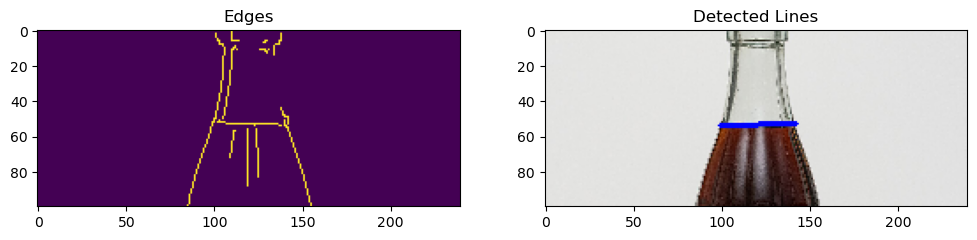

In [36]:
import cv2
import numpy as np

# Load image
image = cv2.imread('imagenes/bottle.jpg')  # Replace with your image
downscale_factor = 0.2
image = cv2.resize(
    image,
    dsize=(
        int(image.shape[1]*downscale_factor),
        int(image.shape[0]*downscale_factor)
    )
)

image = image[50:150, :, :]
# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocess image
blurred = cv2.GaussianBlur(image_gray, (5, 5), 2)
edges = cv2.Canny(blurred, 150, 200)

# Detect lines using Hough Transform
lines = cv2.HoughLinesP(
    edges,            # Edge image
    rho=1,            # Distance resolution (pixels)
    theta=np.pi/180,  # Angle resolution (radians)
    threshold=10,     # Min. votes to detect a line
    minLineLength=20, # Min. line length (pixels)
    maxLineGap=50     # Max. allowed gap between line segments
)

# Filter lines based on angle
horizontal_lines = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.degrees(np.arctan2(y2-y1, x2-x1))
        if abs(angle) < 10:  # Horizontal lines
            horizontal_lines.append(line
)

print(f'lines detected: {len(horizontal_lines)}')

for i, line in enumerate(horizontal_lines):
    x1, y1, x2, y2 = line[0]
    print(f'line {i+1}: x1 = {x1}, y1 = {y1} -> x2 = {x2}, y2 = {y2}')
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(121), plt.imshow(edges), plt.title('Edges')
plt.subplot(122), plt.imshow(image[:,:,::-1]), plt.title('Detected Lines')
plt.show()

## 🟠 Detectar Círculos con Hough Circles

Esta técnica permite detectar círculos dentro de una imagen. Veremos cómo ajustar los parámetros para identificar objetos redondos como monedas o tapas.

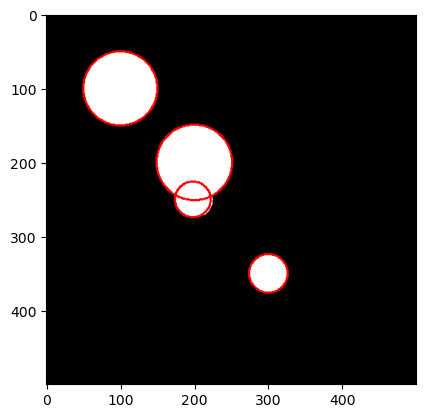

In [37]:
image = np.zeros((500, 500), dtype=np.uint8)
cv2.circle(image, (100, 100), 50, 255, -1)
cv2.circle(image, (200, 200), 50, 255, -1)
cv2.circle(image, (300, 350), 25, 255, -1)
cv2.circle(image, (200, 250), 25, 255, -1)
image_rgb = np.repeat(image[:, :, None], 3, axis=2)

circles = cv2.HoughCircles(
    image,
    cv2.HOUGH_GRADIENT,
    dp=1,            # Inverse ratio of accumulator resolution
    minDist=30,      # Minimum distance between detected centers
    param1=100,      # Upper threshold for Canny edge detector
    param2=10,       # Threshold for center detection (lower = more false circles)
    minRadius=1,     # Minimum radius
    maxRadius=100    # Maximum radius
) # returns [[[xc1, yx1, rc1]]] (float)

# Draw circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]

        # Draw the outer circle
        cv2.circle(image_rgb, center, radius, (255, 0 ,0), 2)

plt.imshow(image_rgb)
plt.show()

## 🧪 Ejercicio: Detección de Monedas

En este ejercicio se aplicarán los conocimientos previos para detectar monedas en una imagen real, combinando detección de bordes, suavizado y Hough Circles.

In [38]:
# Load image and downscale
image = cv2.imread('imagenes/coins_and_box.jpeg')  # Replace with your image
downscale_factor = 0.2
image = cv2.resize(
    image,
    dsize=(
        int(image.shape[1]*downscale_factor),
        int(image.shape[0]*downscale_factor)
    )
)

# preprocess image
blurred = cv2.GaussianBlur(image, (3, 3), 2)
image_gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(
    image,
    cv2.HOUGH_GRADIENT,
    dp=1,            # Inverse ratio of accumulator resolution
    minDist=30,      # Minimum distance between detected centers
    param1=100,      # Upper threshold for Canny edge detector
    param2=10,       # Threshold for center detection (lower = more false circles)
    minRadius=1,     # Minimum radius
    maxRadius=100    # Maximum radius
) # returns [[[xc1, yx1, rc1]]] (float)

mask = np.zeros_like(image_gray)

error: OpenCV(4.10.0) /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_81ng91bl78/croot/opencv-suite_1738943359148/work/modules/imgproc/src/hough.cpp:2269: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'HoughCircles'
